<div class="jumbotron">
  <h1 class="display-3">Fourth (basic) lesson with Abinit and AbiPy</h1>
  <p class="lead">The H<sub>2</sub> molecule</p> 
  <hr class="my-4">
  <p>This lesson aims at showing how to get the following physical properties, for a metal, and for a surface:

the total energy
the lattice parameter
the relaxation of surface atoms
the surface energy You will learn about the smearing of the Brillouin zone integration, and also a bit about preconditioning the SCF cycle.
This lesson should take about 1 hour and 30 minutes.
</p>
  <p class="lead">
    <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
  </p>
</div>

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np
import seaborn as sns

from abipy import abilab

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## The convergence study with respect to both number of k points and broadening

Note that there is usually a STRONG cross-convergence effect between the number of k points and the value of the broadening, tsmear.
The right procedure is: for each value of tsmear, to get the convergence with respect to the number of k points, then to compare the k-point converged values for different values of tsmear.

In what follows, we will restrict ourselves to the grids with nkpt=2, 10 and 28.

As usual, we start by writing an helper function to generate the input for the structural relaxation of Al.
The function accepts `tsmear` and another parameter, `nksmall`, that will be used to define the BZ sampling:

In [2]:
from lesson_base4 import relax_input
abilab.print_source(relax_input)

Now we use `relax_input` to generate multiple inputs with different values of `tsmear` and `nksmall`
and we pass the input objects to the Flow constructor.
To keep things as simple as possible, we use independent tasks ...

In [3]:
from lesson_base4 import build_relax_tsmear_nkpts_convflow
abilab.print_source(build_relax_tsmear_nkpts_convflow)

In [4]:
#abo = abilab.abiopen("flow_al_relax/w0/t0/run.abo")
#print(abo)

In [5]:
#abo.plot();

In [6]:
#hist = abilab.abiopen("flow_al_relax/w0/t0/outdata/out_HIST.nc")
#print(hist)

In [7]:
#hist.plot();

In [17]:
robot = abilab.GsrRobot.from_dir("flow_al_relax_tsmear_nkpt")
data = robot.get_dataframe()

monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed, use python netcdf to change the value of `monkhorst_pack_folding`
monkhorst_pack_folding variables has not been written to netcdf file.
Received [-2147483647 -2147483647 -2147483647]
Set mpdivs to None, this could create problems in post-processing tools.
If needed

/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-11 02:35:21.714274. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
data

,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden,...,angle0,angle1,angle2,a,b,c,volume,abispg_num,spglib_symb,spglib_num
flow_al_relax_tsmear_nkpt/w0/t0/outdata/out_GSR.nc,-56.915411,-0.000528,0.0,6.0,-1.0,0.01,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t1/outdata/out_GSR.nc,-57.061497,-0.000984,0.0,6.0,-1.0,0.01,10,1,1,1,...,60.0,60.0,60.0,2.808448,2.808448,2.808448,15.663335,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t10/outdata/out_GSR.nc,-57.089434,-0.001593,0.0,6.0,-1.0,0.04,10,1,1,1,...,60.0,60.0,60.0,2.807934,2.807934,2.807934,15.654741,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc,-57.100966,-0.010754,0.0,6.0,-1.0,0.04,28,1,1,1,...,60.0,60.0,60.0,2.806128,2.806128,2.806128,15.624541,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t2/outdata/out_GSR.nc,-57.099069,-0.012200,0.0,6.0,-1.0,0.01,28,1,1,1,...,60.0,60.0,60.0,2.804996,2.804996,2.804996,15.605642,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t3/outdata/out_GSR.nc,-56.958789,-0.000528,0.0,6.0,-1.0,0.02,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t4/outdata/out_GSR.nc,-57.077312,-0.001022,0.0,6.0,-1.0,0.02,10,1,1,1,...,60.0,60.0,60.0,2.808507,2.808507,2.808507,15.664326,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t5/outdata/out_GSR.nc,-57.098237,-0.012455,0.0,6.0,-1.0,0.02,28,1,1,1,...,60.0,60.0,60.0,2.804765,2.804765,2.804765,15.601784,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t6/outdata/out_GSR.nc,-57.002167,-0.000528,0.0,6.0,-1.0,0.03,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t7/outdata/out_GSR.nc,-57.084682,-0.002278,0.0,6.0,-1.0,0.03,10,1,1,1,...,60.0,60.0,60.0,2.807066,2.807066,2.807066,15.640217,225,Fm-3m,225


/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-11 02:35:09.291270. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


First of all, let's sort our rows first by `nkpt` and then by `tsmear` inside each `nkpt` group so that 
we have print the table in a nice format:

In [19]:
data = data.sort_values(by=["nkpt", "tsmear"])
data

,energy,pressure,max_force,ecut,pawecutdg,tsmear,nkpt,nsppol,nspinor,nspden,...,angle0,angle1,angle2,a,b,c,volume,abispg_num,spglib_symb,spglib_num
flow_al_relax_tsmear_nkpt/w0/t0/outdata/out_GSR.nc,-56.915411,-0.000528,0.0,6.0,-1.0,0.01,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t3/outdata/out_GSR.nc,-56.958789,-0.000528,0.0,6.0,-1.0,0.02,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t6/outdata/out_GSR.nc,-57.002167,-0.000528,0.0,6.0,-1.0,0.03,2,1,1,1,...,60.0,60.0,60.0,2.828375,2.828375,2.828375,15.999122,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t9/outdata/out_GSR.nc,-57.045545,-0.000528,0.0,6.0,-1.0,0.04,2,1,1,1,...,60.0,60.0,60.0,2.828376,2.828376,2.828376,15.999130,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t1/outdata/out_GSR.nc,-57.061497,-0.000984,0.0,6.0,-1.0,0.01,10,1,1,1,...,60.0,60.0,60.0,2.808448,2.808448,2.808448,15.663335,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t4/outdata/out_GSR.nc,-57.077312,-0.001022,0.0,6.0,-1.0,0.02,10,1,1,1,...,60.0,60.0,60.0,2.808507,2.808507,2.808507,15.664326,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t7/outdata/out_GSR.nc,-57.084682,-0.002278,0.0,6.0,-1.0,0.03,10,1,1,1,...,60.0,60.0,60.0,2.807066,2.807066,2.807066,15.640217,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t10/outdata/out_GSR.nc,-57.089434,-0.001593,0.0,6.0,-1.0,0.04,10,1,1,1,...,60.0,60.0,60.0,2.807934,2.807934,2.807934,15.654741,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t2/outdata/out_GSR.nc,-57.099069,-0.012200,0.0,6.0,-1.0,0.01,28,1,1,1,...,60.0,60.0,60.0,2.804996,2.804996,2.804996,15.605642,225,Fm-3m,225
flow_al_relax_tsmear_nkpt/w0/t5/outdata/out_GSR.nc,-57.098237,-0.012455,0.0,6.0,-1.0,0.02,28,1,1,1,...,60.0,60.0,60.0,2.804765,2.804765,2.804765,15.601784,225,Fm-3m,225


/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-11 02:35:55.145773. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [ ]:
sns.pairplot(data, x_vars="nkpt", y_vars=["energy", "a", "volume"], hue="tsmear"); #, plot_kws={"style": "-o"})

In [ ]:
#grid = sns.FacetGrid(data, col="tsmear")
#grid.map(sns.pointplot, "nkpts", "a")
#sns.pairplot(data, x_vars="nkpts", y_vars=["energy", "a", "volume"], hue="tsmear")
#grid.map(plt.scatter, s=50)

    #with abilab.abirobot(flow, "GSR") as robot:
    #    data = robot.get_dataframe()
    #    print(data)
    #    robot.pairplot(x_vars="nkpts", y_vars=["energy", "a", "volume"], hue="tsmear")

    #grid = sns.FacetGrid(data, col="tsmear")
    #grid.map(sns.pointplot, "nkpts", "a")
    #sns.pairplot(data, x_vars="nkpts", y_vars=["energy", "a", "volume"], hue="tsmear")
    #grid.map(plt.scatter, s=50)

In [ ]:
with abilab.abiopen("flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc") as gsr:
    ebands_w0t11 = gsr.ebands

In [ ]:
ebands_w0t11.plot();

In [ ]:
ebands_w0t11.boxplot();

Now you might ask yourself: "The total energy with nkpt == 2 is clearly not converged wrt tsmear. What are the effects of the smearing on the KS eigenvalues for nkpt == 2?"
The `GsrRobot` can construct an `ElectronBandsPlotter` that allows us to compare multiple band structures 
so it's just a matter of telling the robot that we want a plotter object in which only the
`GSR` files with only two k-points in the IBZ, then we can use the plotter to visualize the results: 

<IPython.core.display.Javascript object>


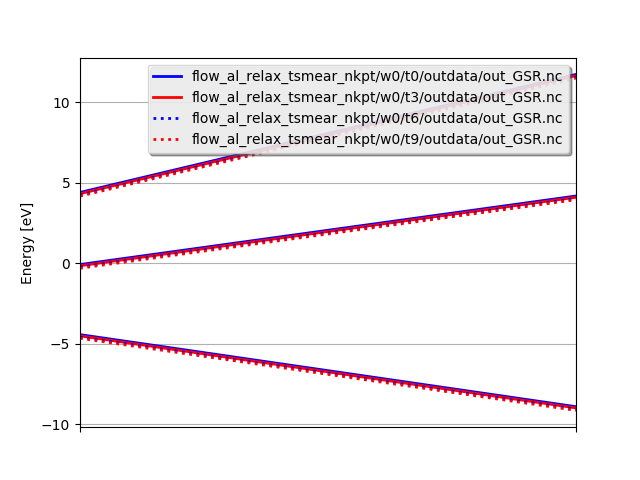

/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-11 02:52:16.640840. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
plotter = robot.get_ebands_plotter(filter_abifile=lambda gsr: len(gsr.kpoints) == 2)
plotter.combiplot();

The plotter provides different plot methods to visualize the same data.
Perhaps you prefer this:

/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


<IPython.core.display.Javascript object>


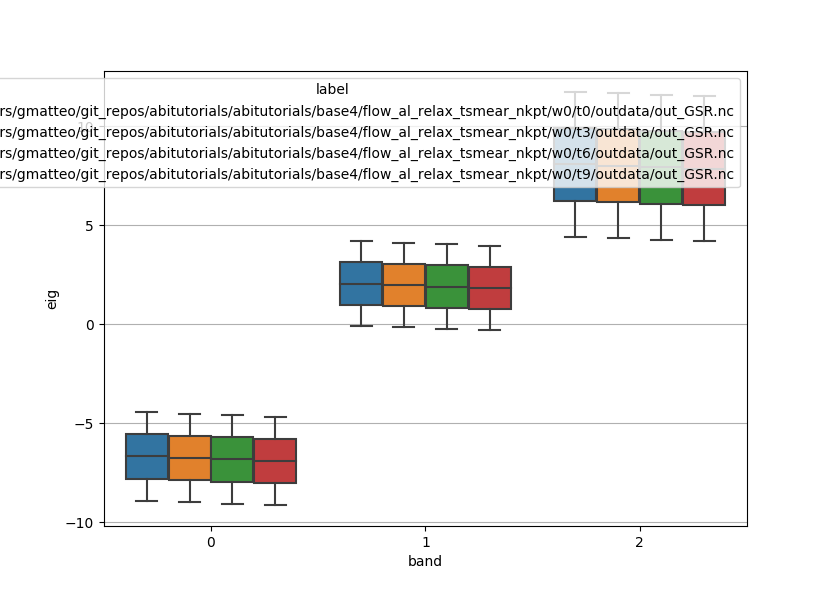

/Users/gmatteo/anaconda3/envs/env3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-11 02:59:35.020951. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [32]:
plotter.combiboxplot();

In [ ]:
#e3d = ebands.get_ebands3d()